In [153]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os
import math 

plt.rcParams['figure.figsize'] = (10, 4)

In [88]:
# Daily data
data = xr.open_dataset('./data/sstd_anom_mean_GO.nc')
sstdGO_anom = data.sst
data = xr.open_dataset('./data/sstd_anom_mean_NH.nc')
sstdNH_anom = data.sst
data = xr.open_dataset('./data/sstd_anom_mean_SH.nc')
sstdSH_anom = data.sst

sstdSH_anom_rolling = sstdSH_anom.rolling(time = 360 , center = True).mean()
sstdNH_anom_rolling = sstdNH_anom.rolling(time = 360 , center = True).mean()
sstdGO_anom_rolling = sstdGO_anom.rolling(time = 360 , center = True).mean()

fileOut = './images/sstd_GO_HN_HS.png'

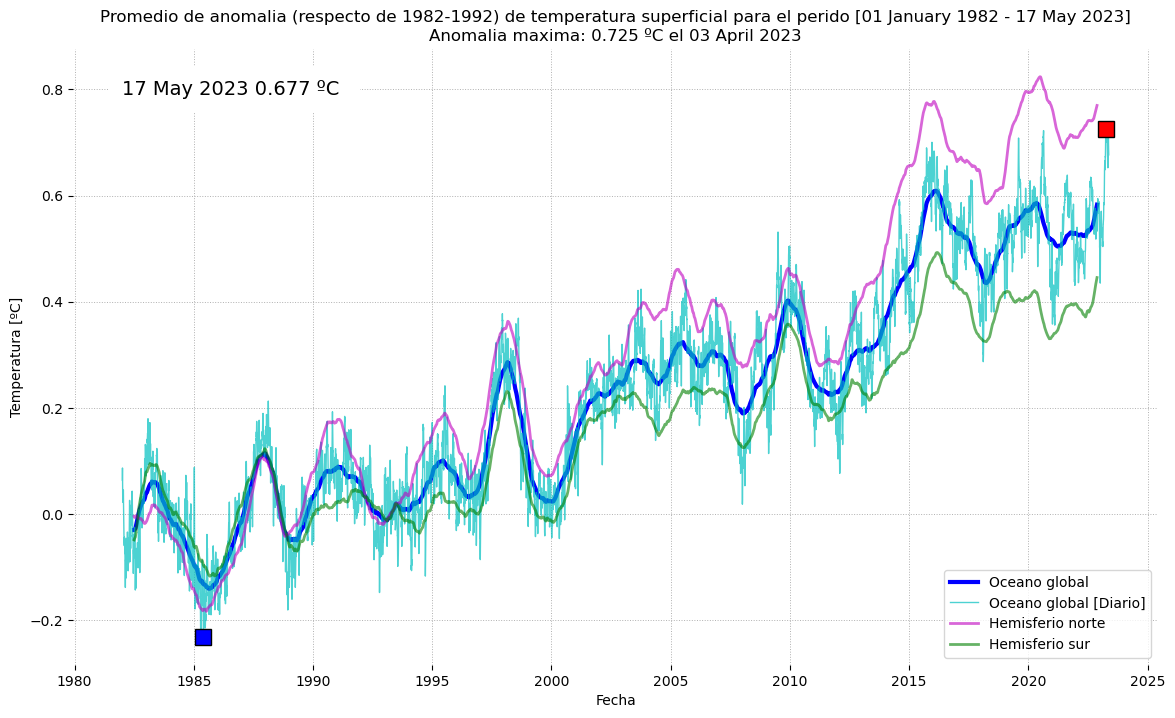

In [154]:
fig,ax = plt.subplots(figsize=(14,8))

ax.plot(sstdGO_anom_rolling.time,sstdGO_anom_rolling,'b',label='Oceano global',linewidth=3)
ax.plot(sstdGO_anom.time,sstdGO_anom,'c',linewidth=1,alpha=0.7, label='Oceano global [Diario]')
ax.plot(sstdNH_anom_rolling.time,sstdNH_anom_rolling,'m',label='Hemisferio norte',linewidth=2,alpha=0.6)
ax.plot(sstdSH_anom_rolling.time,sstdSH_anom_rolling,'g',label='Hemisferio sur',linewidth=2,alpha=0.6)

tmax = sstdGO_anom.isel(sstdGO_anom.argmax(...))
tmin = sstdGO_anom.isel(sstdGO_anom.argmin(...))
d_tmax = sstdGO_anom.time.isel(sstdGO_anom.argmax(...))
d_tmin = sstdGO_anom.time.isel(sstdGO_anom.argmin(...))
    
ax.plot(d_tmax , tmax,'rs' , markersize = 12 , markeredgecolor='k')
ax.plot(d_tmin , tmin,'bs' , markersize = 12 , markeredgecolor='k')

ax.legend(loc = 4)
ax.grid(linestyle=':', linewidth=.7)

ax.set_ylabel('Temperatura [ºC]')
ax.set_xlabel('Fecha')


TituloFigura ='Promedio de anomalia (respecto de 1982-1992) de temperatura superficial para el perido '
tPeriodo = '['+sstdGO_anom.time[0].dt.strftime("%d %B %Y").values + " - "+ sstdGO_anom.time[-1].dt.strftime("%d %B %Y").values + ']'
tTActual = sstdGO_anom.time[-1].dt.strftime("%d %B %Y").values + " %2.3f ºC "%(sstdGO_anom[-1].values)
tTMaxima = 'Anomalia maxima: ' + "%2.3f ºC"%(sstdGO_anom.isel(sstdGO_anom.argmax(...)).values)
tFechaTMaxima = ' el ' + sstdGO_anom.time.isel(sstdGO_anom.argmax(...)).dt.strftime("%d %B %Y").values
tAnomalia = 'respecto de 1982-1992'

ax.text(sstdGO_anom.time[0] , math.floor(ax.get_ylim()[1]*10)/10 , tTActual, va = 'center',
                bbox={'facecolor':'white', 'edgecolor':'none', 'pad':10},size=14)


ax.set_title(TituloFigura + tPeriodo +'\n' + tTMaxima + tFechaTMaxima);
ax.set_frame_on(False)
plt.savefig(fileOut)

    

In [152]:
import math
math.floor(l[1]*10)/10

0.8